<a href="https://colab.research.google.com/drive/1zGAAsChUnGckSaaHEk6u_a634vTtoHBD#scrollTo=t3P50WNxXKe5">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Objective:**:
#### Help a healthcare management company identify high risk patinet to lower healthcare cost

Recommend high premium plan for high risk patient.  
there are 5 category of patient.

Dataset: 16 features and 45k observation




#### goal of case study: optimize reimbursement cost
Predicting high risk patient who has high chances of developing disease.
Identify the factor neccessary for classification of patient into risk category
* category 5: highest risk patient, 
* category 1: lowest risk patient

Allow insurer to serve the patient much better



### Five pre defined bucket called risk category
these are target variable.
1. Low, 
2. Emerging
3. Moderate 
4. High
5. Very high 

type 2,3 are the candidate considered for wellness program
type 4 is disease managment program
type 5 are candidate for case managment(company interested in 4,5)
we were interested in accuracy of bucket 4,5


#### why not clustering used for classification
clustering technique would have given a group of simillar patient, which not neecessarily map to these bucket. 

why RF& DF, : supvised learning algorithm, because here target output categories are already defined unlike classic use case of clustering algorithm where a new group do not have pre defined category.


In [4]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [5]:
# Read dataset
url= "https://raw.githubusercontent.com/shivckr/Insurance_claim/master/ClaimsData.csv"
insurance_data = pd.read_csv(url)

In [7]:
# Display first five rows 
insurance_data.head()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [8]:
# Info of dataframe
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458005 entries, 0 to 458004
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   age                458005 non-null  int64
 1   alzheimers         458005 non-null  int64
 2   arthritis          458005 non-null  int64
 3   cancer             458005 non-null  int64
 4   copd               458005 non-null  int64
 5   depression         458005 non-null  int64
 6   diabetes           458005 non-null  int64
 7   heart.failure      458005 non-null  int64
 8   ihd                458005 non-null  int64
 9   kidney             458005 non-null  int64
 10  osteoporosis       458005 non-null  int64
 11  stroke             458005 non-null  int64
 12  reimbursement2008  458005 non-null  int64
 13  bucket2008         458005 non-null  int64
 14  reimbursement2009  458005 non-null  int64
 15  bucket2009         458005 non-null  int64
dtypes: int64(16)
memory usage: 55.9 MB


In [9]:
# Descriptive statistics of data
insurance_data.describe()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000
mean,72.628401,0.192214,0.154293,0.064106,0.136071,0.213076,0.380463,0.284744,0.420063,0.161153,0.173996,0.044792,4004.963854,1.436862,4277.432823,1.522160
std,12.557114,0.394041,0.361230,0.244942,0.342864,0.409482,0.485501,0.451293,0.493569,0.367673,0.379106,0.206847,9784.064063,0.861955,8480.041283,0.870425
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.000000
50%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,950.000000,1.000000,1540.000000,1.000000
75%,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3110.000000,2.000000,4220.000000,2.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221640.000000,5.000000,189930.000000,5.000000


In [10]:
#Replace target values from 1 to 5 to 0 to 4
insurance_data [['bucket2008','bucket2009']]=insurance_data [['bucket2008','bucket2009']].apply(pd.Series.replace, to_replace=1, value=0)
insurance_data [['bucket2008','bucket2009']]=insurance_data [['bucket2008','bucket2009']].apply(pd.Series.replace, to_replace=2, value=1)
insurance_data [['bucket2008','bucket2009']]=insurance_data [['bucket2008','bucket2009']].apply(pd.Series.replace, to_replace=3, value=2)
insurance_data [['bucket2008','bucket2009']]=insurance_data [['bucket2008','bucket2009']].apply(pd.Series.replace, to_replace=4, value=3)
insurance_data [['bucket2008','bucket2009']]=insurance_data [['bucket2008','bucket2009']].apply(pd.Series.replace, to_replace=5, value=4)

### Visualizations

In [12]:
# Partition into age buckets 
def agetype_func(age):
    if age.item()<40:
        return 'Young'
    elif age.item()>=40 and age.item()<50:
        return 'Middle aged (40-50)' 
    elif age.item()>=50 and age.item()<60:
        return 'Middle aged(50-60)'
    else:
        return 'Old(>60)'
insurance_data['AgeType'] = insurance_data[['age']].apply(agetype_func, axis=1)

In [17]:
# Partition into buckets of insurance risk
def insurance_stat(yes):
    if yes.item()==0:
        return 'Low'
    elif yes.item()==1:
        return 'Emerging' 
    elif yes.item()==2:
        return 'Moderate' 
    elif yes.item()==3:
        return 'High' 
    else:
        return 'Very High'
insurance_data['bucket2009_type'] = insurance_data[['bucket2009']].apply(insurance_stat, axis=1)
insurance_data['bucket2008_type'] = insurance_data[['bucket2008']].apply(insurance_stat, axis=1)

In [16]:
insurance_data['bucket2009'].unique()

array([0, 1, 2, 3, 4])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


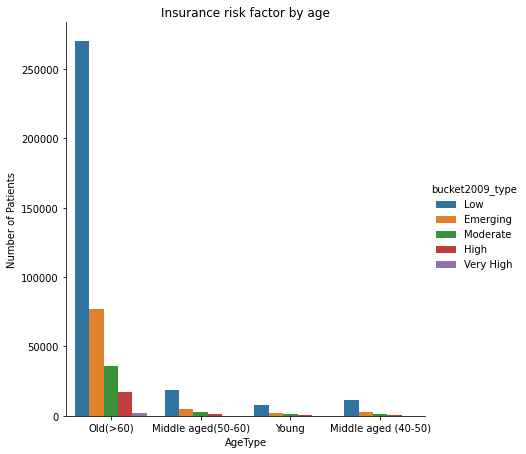

In [18]:
# Percentage of patients in each insurance bucket by age?
mx = sns.factorplot(x="AgeType", hue='bucket2009_type',data=insurance_data, kind="count", size=6)
mx.set(ylabel='Number of Patients')
plt.title('Insurance risk factor by age');


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Insurance Reimbursement for each age and bucket type in 2009')

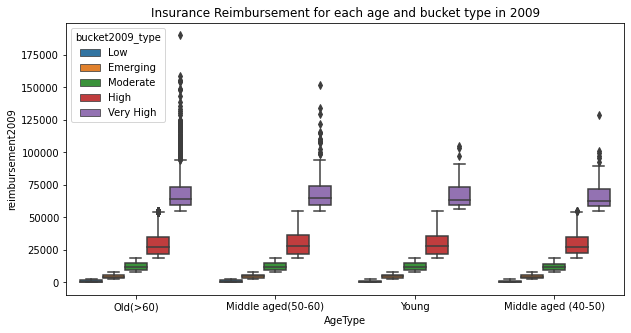

In [19]:
# The amount of reimbursement for each age type and bucket type is shown in the year 2009
plt.figure(figsize=(10,5))
sns.boxplot('AgeType','reimbursement2009',data=insurance_data, hue="bucket2009_type")
plt.title('Insurance Reimbursement for each age and bucket type in 2009')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Insurance Reimbursement for each age and bucket type in 2008 ')

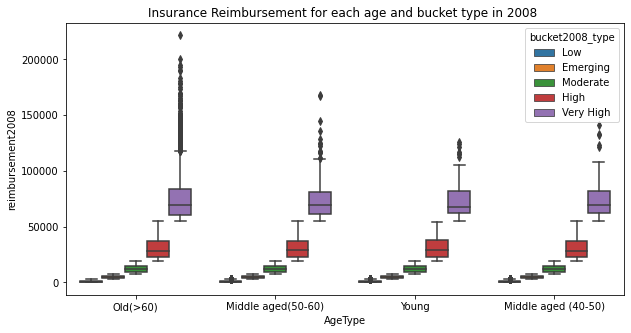

In [20]:
# The amount of reimbursement for each age type and bucket type is shown in the year 2008
plt.figure(figsize=(10,5))
sns.boxplot('AgeType','reimbursement2008', data=insurance_data, hue="bucket2008_type")
plt.title('Insurance Reimbursement for each age and bucket type in 2008 ')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Insurance Reimbursement for people affected by depression ')

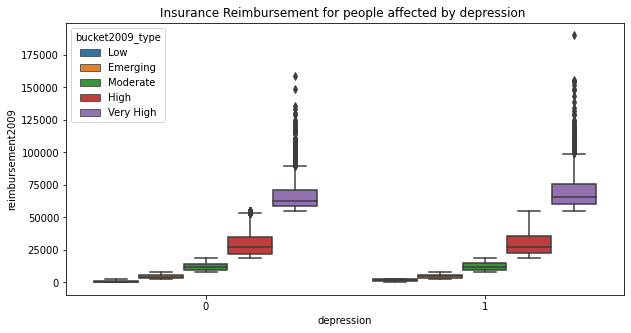

In [21]:
# Insurance Reimbursement for people affected by depression
plt.figure(figsize=(10,5))
sns.boxplot('depression','reimbursement2009', data=insurance_data, hue="bucket2009_type")
plt.title('Insurance Reimbursement for people affected by depression ')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Insurance Reimbursement for people affected by cancer in 2009 ')

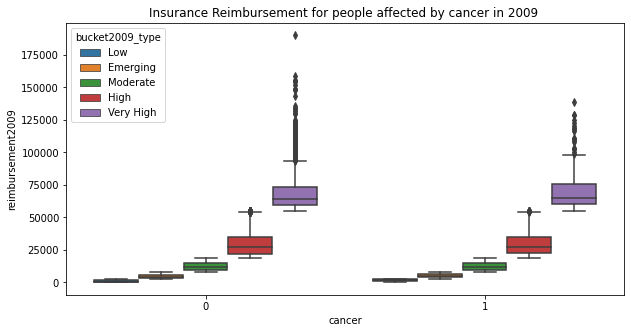

In [22]:
# Insurance Reimbursement for people affected by cancer in 2009
plt.figure(figsize=(10,5))
sns.boxplot('cancer','reimbursement2009', data=insurance_data, hue="bucket2009_type")
plt.title('Insurance Reimbursement for people affected by cancer in 2009 ')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


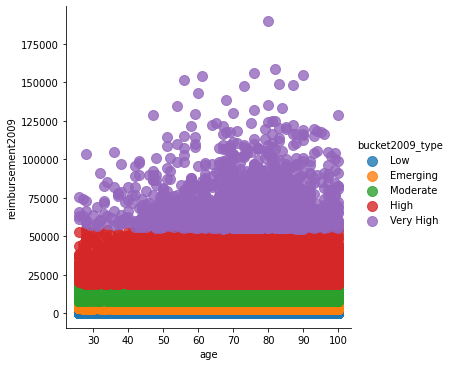

In [23]:
# When the risk factor is high there are more chances of reimbursement.
sns.lmplot('age', # Horizontal axis
           'reimbursement2009', # Vertical axis
           data=insurance_data, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="bucket2009_type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


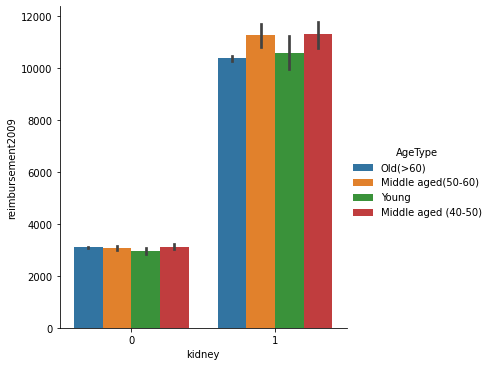

In [24]:
#How is the reimbursement with amongst ages with kidney problems
sns.factorplot(x="kidney", y="reimbursement2009", hue="AgeType", data=insurance_data, kind="bar");

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

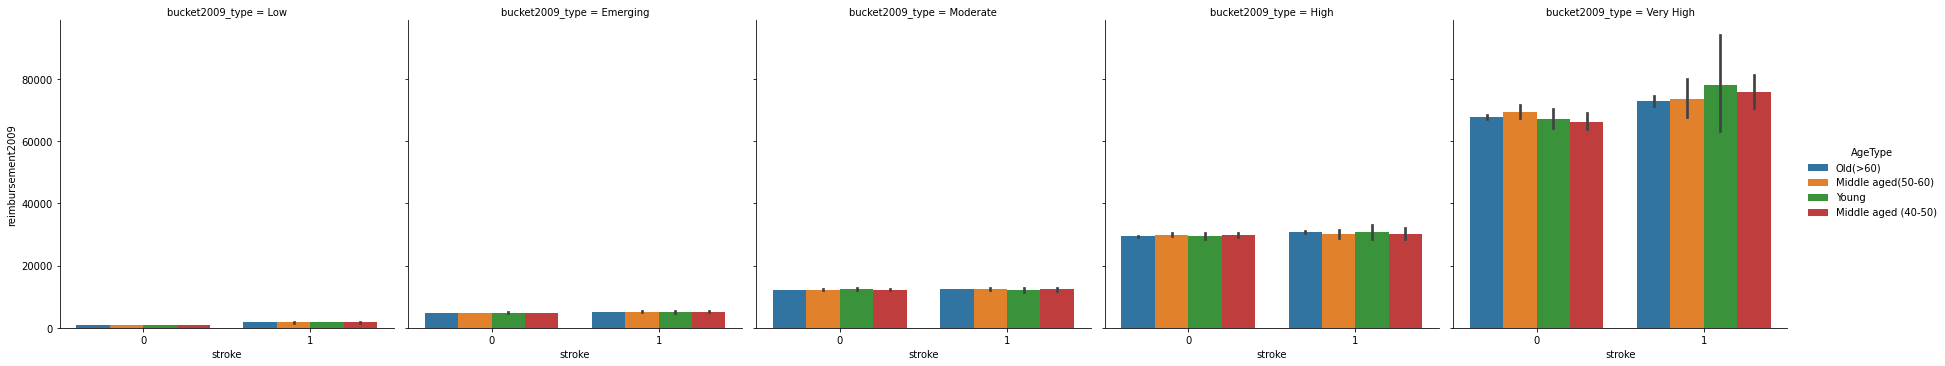

In [25]:
##How is the reimbursement with amongst ages with stroke problems
plt.figure(figsize=(10,9))
sns.factorplot(x="stroke", y="reimbursement2009", hue="AgeType", data=insurance_data, kind="bar",col="bucket2009_type");

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1800x648 with 0 Axes>

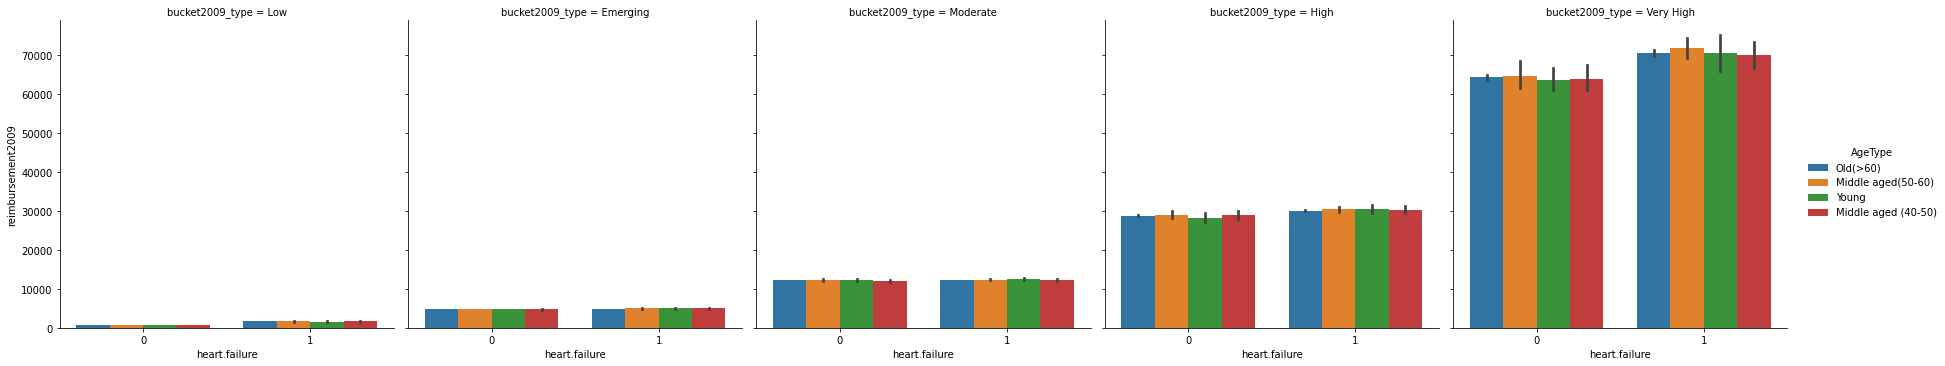

In [26]:
#How is the reimbursement with amongst ages with heart failure
plt.figure(figsize=(25,9))
sns.factorplot(x="heart.failure", y="reimbursement2009", hue="AgeType", data=insurance_data, kind="bar",col="bucket2009_type");

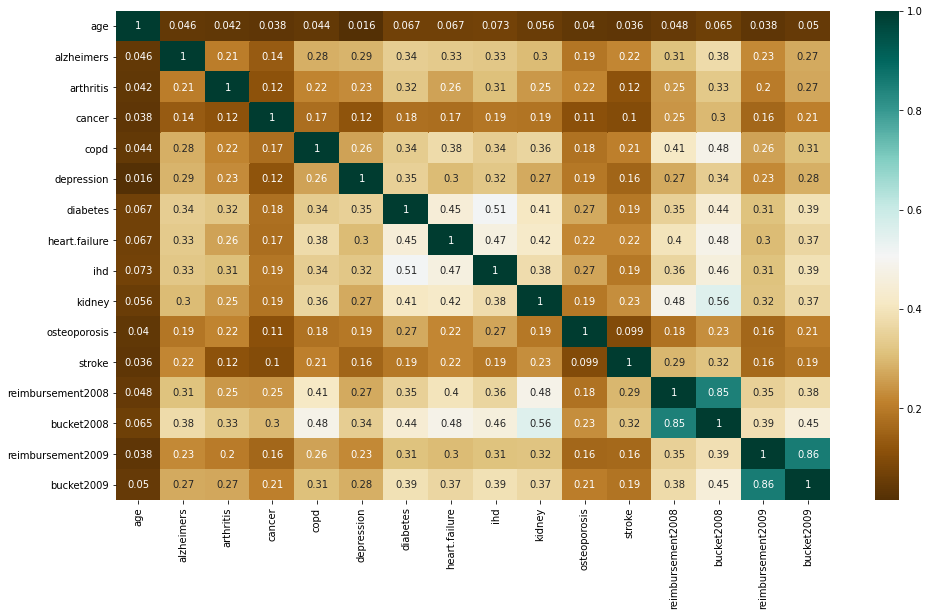

In [27]:
#Heatmap 
plt.figure(figsize=(16,9))
sns.heatmap(insurance_data.corr(),cmap="BrBG",annot=True)

In [28]:
#Let's remove highly correlated values
insurance_data.drop(['AgeType','bucket2009_type','bucket2008_type'],axis=1,inplace=True)

#### Prepare the data

In [29]:
insurance_data['bucket2008'].value_counts()

0    340202
1     63173
2     30847
3     19914
4      3869
Name: bucket2008, dtype: int64

In [31]:
# Split datasset into train and test
X = insurance_data.drop(['bucket2009','reimbursement2009'],axis=1)
y = insurance_data.bucket2009

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Decision tree classifier

dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=10,class_weight='balanced')
dt_model=dt.fit(X_train,y_train)

In [34]:
# Let's understand feature imporatnce

#dt_model.feature_importances_
list(zip(X.columns,dt_model.feature_importances_))

[('age', 0.23380905487615966),
 ('alzheimers', 0.02444849664366842),
 ('arthritis', 0.02031170350449697),
 ('cancer', 0.008536262168119759),
 ('copd', 0.012124068521134209),
 ('depression', 0.03067570484027315),
 ('diabetes', 0.020243295225006275),
 ('heart.failure', 0.020200775223517153),
 ('ihd', 0.015083633383270846),
 ('kidney', 0.014574139229589),
 ('osteoporosis', 0.026944321486020214),
 ('stroke', 0.008624652707366868),
 ('reimbursement2008', 0.5640998959850168),
 ('bucket2008', 0.00032399620636065497)]

In [36]:
# export insurance model tree

from sklearn import tree
with open("insurance_tree.dot", 'w') as f:
    f = tree.export_graphviz(dt_model, out_file=f, feature_names=X.columns)

In [38]:
# Confusion matrix
dt_prd=dt_model.predict(X_test)
print(metrics.accuracy_score(y_test,dt_prd))
df_confusion = metrics.confusion_matrix(y_test,dt_prd)
df_confusion

0.5068121080854483


array([[47491,  9400,  9246,  8899,  1986],
       [ 2507,  6114,  5754,  5571,  1702],
       [ 1254,  2607,  2751,  2657,   883],
       [  471,  1157,  1201,  1577,   616],
       [   50,   114,   157,   239,    98]])

In [39]:
print(metrics.classification_report(y_test,dt_prd))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     77022
           1       0.32      0.28      0.30     21648
           2       0.14      0.27      0.19     10152
           3       0.08      0.31      0.13      5022
           4       0.02      0.15      0.03       658

    accuracy                           0.51    114502
   macro avg       0.30      0.33      0.28    114502
weighted avg       0.69      0.51      0.58    114502



In [40]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.672669
Name: bucket2009, dtype: float64

In [41]:
# Random Forest Classifier
rf_clf=RandomForestClassifier(min_samples_leaf=20)
rf_model=rf_clf.fit(X_train,y_train)
rf_prediction=rf_model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,rf_prediction))
print(metrics.confusion_matrix(y_test,rf_prediction))
print(metrics.classification_report(y_test,rf_prediction))

#### Although the accuracy increases the f1 score of the high risk factor case is 0 which is a little dangerous.
#### So let us balance the class weight and increase number of estimators

In [42]:
rf_clf=RandomForestClassifier(n_estimators=100,class_weight="balanced",min_samples_leaf=40)
rf_model=rf_clf.fit(X_train,y_train)
rf_prediction=rf_model.predict(X_test)

In [43]:
print(metrics.accuracy_score(y_test,rf_prediction))
print(metrics.confusion_matrix(y_test,rf_prediction))
print(metrics.classification_report(y_test,rf_prediction))

0.6040156503816527
[[56289 13635  4416  1525  1157]
 [ 3565  9808  3921  2650  1704]
 [ 1827  3833  1934  1498  1060]
 [  697  1514   845   931  1035]
 [   63   155    89   152   199]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81     77022
           1       0.34      0.45      0.39     21648
           2       0.17      0.19      0.18     10152
           3       0.14      0.19      0.16      5022
           4       0.04      0.30      0.07       658

    accuracy                           0.60    114502
   macro avg       0.32      0.37      0.32    114502
weighted avg       0.69      0.60      0.64    114502

